In [2]:
#  Working with Logistic Regression & Images in PyTorch

In [3]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('03-logistic-regression-26006')
jovian.set_colab_id('1Vn6aqkqyL0vWUzJNVuZ4WgPyp2qsasdy')

     |████████████████████████████████| 68 kB 2.6 MB/s 


In [4]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [5]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [6]:
len(dataset)

60000

In [7]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [8]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F644B7B8090>, 5)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


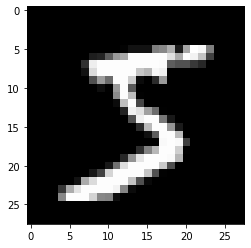

In [10]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


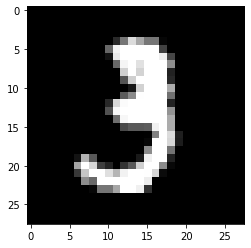

In [11]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [12]:
import torchvision.transforms as transforms

In [13]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [14]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [15]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


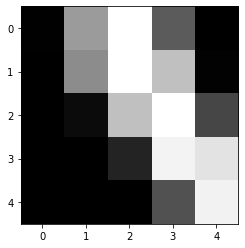

In [16]:
# Plot the image using 28 * 28 Matrix 
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

In [17]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [18]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [19]:
# Install the library
!pip install jovian --upgrade --quiet

In [20]:
import jovian

In [21]:
jovian.commit(project='03-logistic-regression-live')

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/blackholegalaxytechnologies/03-logistic-regression-live


'https://jovian.ai/blackholegalaxytechnologies/03-logistic-regression-live'

In [22]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [23]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0175,  0.0303,  0.0172,  ..., -0.0036, -0.0167,  0.0299],
        [-0.0309,  0.0304, -0.0256,  ...,  0.0289,  0.0294, -0.0262],
        [ 0.0197,  0.0209, -0.0036,  ..., -0.0192, -0.0058,  0.0242],
        ...,
        [-0.0135,  0.0311, -0.0227,  ...,  0.0303,  0.0185,  0.0284],
        [ 0.0229,  0.0170,  0.0119,  ...,  0.0316, -0.0269, -0.0081],
        [-0.0319, -0.0188, -0.0139,  ...,  0.0271, -0.0043,  0.0272]],
       requires_grad=True)

In [24]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 3.4715e-03, -2.8261e-02, -2.2119e-02, -6.3858e-05, -1.9451e-02,
        -5.8459e-03,  2.1675e-02, -1.6930e-02,  1.4074e-02,  3.5586e-02],
       requires_grad=True)

In [25]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([7, 8, 9, 8, 5, 2, 2, 3, 7, 6, 4, 0, 1, 3, 3, 7, 5, 7, 4, 1, 7, 8, 7, 5,
        8, 3, 6, 8, 4, 7, 1, 4, 9, 7, 5, 7, 2, 6, 7, 1, 8, 3, 4, 9, 4, 7, 3, 4,
        8, 0, 0, 9, 1, 0, 9, 4, 4, 4, 4, 7, 7, 1, 8, 3, 1, 3, 5, 8, 1, 8, 3, 6,
        6, 7, 4, 8, 9, 3, 4, 0, 2, 1, 2, 3, 6, 4, 8, 2, 8, 9, 2, 2, 2, 2, 0, 0,
        8, 2, 2, 2, 2, 9, 1, 1, 1, 3, 6, 8, 2, 8, 4, 0, 5, 7, 8, 6, 6, 7, 7, 7,
        8, 1, 1, 4, 0, 4, 5, 3])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [26]:
images.shape

torch.Size([128, 1, 28, 28])

In [27]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [28]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [29]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [30]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0226,  0.0236, -0.0265,  ..., -0.0207,  0.0354, -0.0197],
         [ 0.0104,  0.0155, -0.0130,  ...,  0.0009, -0.0324,  0.0146],
         [-0.0065,  0.0050,  0.0262,  ..., -0.0047,  0.0307, -0.0273],
         ...,
         [ 0.0230,  0.0345,  0.0128,  ..., -0.0258, -0.0078, -0.0021],
         [ 0.0187,  0.0076, -0.0222,  ..., -0.0091,  0.0081,  0.0014],
         [-0.0098,  0.0297,  0.0300,  ..., -0.0144,  0.0192, -0.0234]],
        requires_grad=True), Parameter containing:
 tensor([-0.0287,  0.0064, -0.0052,  0.0049,  0.0188,  0.0237, -0.0241,  0.0126,
          0.0187,  0.0005], requires_grad=True)]

In [31]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0226,  0.0236, -0.0265,  ..., -0.0207,  0.0354, -0.0197],
         [ 0.0104,  0.0155, -0.0130,  ...,  0.0009, -0.0324,  0.0146],
         [-0.0065,  0.0050,  0.0262,  ..., -0.0047,  0.0307, -0.0273],
         ...,
         [ 0.0230,  0.0345,  0.0128,  ..., -0.0258, -0.0078, -0.0021],
         [ 0.0187,  0.0076, -0.0222,  ..., -0.0091,  0.0081,  0.0014],
         [-0.0098,  0.0297,  0.0300,  ..., -0.0144,  0.0192, -0.0234]],
        requires_grad=True), Parameter containing:
 tensor([-0.0287,  0.0064, -0.0052,  0.0049,  0.0188,  0.0237, -0.0241,  0.0126,
          0.0187,  0.0005], requires_grad=True)]

In [32]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.2692,  0.1352,  0.0242,  0.0535,  0.2425,  0.1303, -0.0309,  0.1011,
         -0.0994, -0.0390],
        [-0.0735, -0.0476, -0.2233,  0.2273,  0.2996,  0.1465,  0.0295, -0.1934,
         -0.0735,  0.0274]])


In [33]:
import torch.nn.functional as F

In [34]:
outputs[:2]

tensor([[-0.2692,  0.1352,  0.0242,  0.0535,  0.2425,  0.1303, -0.0309,  0.1011,
         -0.0994, -0.0390],
        [-0.0735, -0.0476, -0.2233,  0.2273,  0.2996,  0.1465,  0.0295, -0.1934,
         -0.0735,  0.0274]], grad_fn=<SliceBackward0>)

In [35]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0738, 0.1107, 0.0990, 0.1020, 0.1232, 0.1101, 0.0937, 0.1070, 0.0875,
         0.0930],
        [0.0906, 0.0930, 0.0780, 0.1224, 0.1316, 0.1129, 0.1004, 0.0804, 0.0906,
         0.1002]])
Sum:  1.0000001192092896


In [36]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 4, 1, 6, 6, 5, 7, 6, 6, 4, 5, 1, 1, 3, 6, 3, 6, 6, 7, 7, 4, 5, 4, 4,
        6, 1, 1, 3, 5, 6, 4, 3, 6, 4, 6, 5, 7, 4, 4, 1, 4, 6, 3, 7, 1, 6, 1, 1,
        5, 6, 5, 5, 4, 1, 4, 6, 6, 4, 6, 1, 6, 2, 0, 6, 5, 6, 5, 6, 6, 4, 1, 6,
        1, 1, 6, 7, 7, 7, 6, 7, 1, 6, 0, 0, 1, 6, 0, 7, 3, 6, 4, 4, 1, 4, 7, 6,
        4, 3, 1, 4, 6, 6, 7, 4, 0, 6, 3, 6, 3, 3, 3, 4, 4, 6, 6, 3, 1, 1, 1, 6,
        6, 7, 4, 7, 6, 6, 8, 5])
tensor([0.1232, 0.1316, 0.1257, 0.1218, 0.1359, 0.1329, 0.1238, 0.1422, 0.1165,
        0.1291, 0.1189, 0.1315, 0.1209, 0.1363, 0.1137, 0.1284, 0.1266, 0.1202,
        0.1493, 0.1512, 0.1175, 0.1267, 0.1273, 0.1188, 0.1423, 0.1172, 0.1176,
        0.1188, 0.1242, 0.1298, 0.1147, 0.1303, 0.1220, 0.1259, 0.1590, 0.1139,
        0.1274, 0.1344, 0.1302, 0.1284, 0.1324, 0.1219, 0.1231, 0.1208, 0.1365,
        0.1305, 0.1188, 0.1243, 0.1177, 0.1147, 0.1208, 0.1254, 0.1199, 0.1307,
        0.1139, 0.1277, 0.1174, 0.1247, 0.1239, 0.1238, 0.1522, 0.1156, 0.1518,
       

In [37]:
labels

tensor([9, 6, 6, 6, 7, 4, 0, 5, 7, 3, 4, 5, 1, 2, 5, 3, 5, 6, 7, 7, 6, 8, 2, 2,
        0, 6, 4, 9, 1, 8, 1, 4, 0, 2, 0, 9, 7, 3, 8, 6, 6, 0, 3, 2, 7, 5, 5, 4,
        3, 8, 1, 8, 3, 9, 1, 2, 2, 3, 0, 4, 6, 0, 6, 8, 8, 7, 9, 2, 6, 4, 0, 4,
        9, 2, 1, 9, 5, 7, 4, 0, 3, 9, 5, 6, 4, 8, 6, 5, 3, 0, 4, 4, 5, 1, 7, 9,
        2, 6, 1, 6, 9, 0, 7, 3, 4, 7, 2, 0, 9, 6, 4, 5, 2, 8, 8, 9, 0, 9, 8, 7,
        5, 5, 6, 7, 6, 0, 1, 1])

In [38]:
outputs[:2]

tensor([[-0.2692,  0.1352,  0.0242,  0.0535,  0.2425,  0.1303, -0.0309,  0.1011,
         -0.0994, -0.0390],
        [-0.0735, -0.0476, -0.2233,  0.2273,  0.2996,  0.1465,  0.0295, -0.1934,
         -0.0735,  0.0274]], grad_fn=<SliceBackward0>)

In [39]:
 preds == labels

tensor([False, False, False,  True, False, False, False, False, False, False,
        False, False,  True, False, False,  True, False,  True,  True,  True,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False,  True,  True,
        False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False,  True, False,
         True,  True, False, False,  True, False, False, False,  True, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True,  True, False, False, False])

Evaluation Metric and Loss 

In [40]:
 def accuracy(outputs, label):
   _,preds =  torch.max(outputs, dim=1)
   return torch.tensor(torch.sum(preds == labels).itemd()/len(preds))

In [41]:
 outputs[:2]

tensor([[-0.2692,  0.1352,  0.0242,  0.0535,  0.2425,  0.1303, -0.0309,  0.1011,
         -0.0994, -0.0390],
        [-0.0735, -0.0476, -0.2233,  0.2273,  0.2996,  0.1465,  0.0295, -0.1934,
         -0.0735,  0.0274]], grad_fn=<SliceBackward0>)

In [42]:
# Softmax is an increasing number and we are aplying on the output Matrix

In [43]:
import torch.nn.functional as F

# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0738, 0.1107, 0.0990, 0.1020, 0.1232, 0.1101, 0.0937, 0.1070, 0.0875,
         0.0930],
        [0.0906, 0.0930, 0.0780, 0.1224, 0.1316, 0.1129, 0.1004, 0.0804, 0.0906,
         0.1002]])
Sum:  1.0000001192092896


In [44]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 4, 1, 6, 6, 5, 7, 6, 6, 4, 5, 1, 1, 3, 6, 3, 6, 6, 7, 7, 4, 5, 4, 4,
        6, 1, 1, 3, 5, 6, 4, 3, 6, 4, 6, 5, 7, 4, 4, 1, 4, 6, 3, 7, 1, 6, 1, 1,
        5, 6, 5, 5, 4, 1, 4, 6, 6, 4, 6, 1, 6, 2, 0, 6, 5, 6, 5, 6, 6, 4, 1, 6,
        1, 1, 6, 7, 7, 7, 6, 7, 1, 6, 0, 0, 1, 6, 0, 7, 3, 6, 4, 4, 1, 4, 7, 6,
        4, 3, 1, 4, 6, 6, 7, 4, 0, 6, 3, 6, 3, 3, 3, 4, 4, 6, 6, 3, 1, 1, 1, 6,
        6, 7, 4, 7, 6, 6, 8, 5])
tensor([0.1232, 0.1316, 0.1257, 0.1218, 0.1359, 0.1329, 0.1238, 0.1422, 0.1165,
        0.1291, 0.1189, 0.1315, 0.1209, 0.1363, 0.1137, 0.1284, 0.1266, 0.1202,
        0.1493, 0.1512, 0.1175, 0.1267, 0.1273, 0.1188, 0.1423, 0.1172, 0.1176,
        0.1188, 0.1242, 0.1298, 0.1147, 0.1303, 0.1220, 0.1259, 0.1590, 0.1139,
        0.1274, 0.1344, 0.1302, 0.1284, 0.1324, 0.1219, 0.1231, 0.1208, 0.1365,
        0.1305, 0.1188, 0.1243, 0.1177, 0.1147, 0.1208, 0.1254, 0.1199, 0.1307,
        0.1139, 0.1277, 0.1174, 0.1247, 0.1239, 0.1238, 0.1522, 0.1156, 0.1518,
       

In [45]:
labels

tensor([9, 6, 6, 6, 7, 4, 0, 5, 7, 3, 4, 5, 1, 2, 5, 3, 5, 6, 7, 7, 6, 8, 2, 2,
        0, 6, 4, 9, 1, 8, 1, 4, 0, 2, 0, 9, 7, 3, 8, 6, 6, 0, 3, 2, 7, 5, 5, 4,
        3, 8, 1, 8, 3, 9, 1, 2, 2, 3, 0, 4, 6, 0, 6, 8, 8, 7, 9, 2, 6, 4, 0, 4,
        9, 2, 1, 9, 5, 7, 4, 0, 3, 9, 5, 6, 4, 8, 6, 5, 3, 0, 4, 4, 5, 1, 7, 9,
        2, 6, 1, 6, 9, 0, 7, 3, 4, 7, 2, 0, 9, 6, 4, 5, 2, 8, 8, 9, 0, 9, 8, 7,
        5, 5, 6, 7, 6, 0, 1, 1])

In [46]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [47]:
accuracy(outputs, labels)

tensor(0.1562)

In [48]:
probs

tensor([[0.0738, 0.1107, 0.0990,  ..., 0.1070, 0.0875, 0.0930],
        [0.0906, 0.0930, 0.0780,  ..., 0.0804, 0.0906, 0.1002],
        [0.0815, 0.1257, 0.0733,  ..., 0.1089, 0.0966, 0.0638],
        ...,
        [0.0722, 0.1086, 0.1059,  ..., 0.0984, 0.0938, 0.0799],
        [0.0928, 0.0903, 0.1095,  ..., 0.1010, 0.1150, 0.0980],
        [0.1037, 0.1127, 0.0800,  ..., 0.0954, 0.0771, 0.0827]],
       grad_fn=<SoftmaxBackward0>)

In [ ]:
# We can't use accuracy as the gradient decsent as it is not differentiable function, 
# torch.max and == are both non functional and non differentiable operations
# It doesn't take into account the accuracy for computing the gradient descent w.r.t weight and height 
# For that reason, accuracy is often used as a evaluation matrix for classification 
# but not for a loss function, A commonly used loss function for classification problem is a cross entropy 

In [ ]:
# Cross-Entropy Loss Function 
# Logarithm of the Probabilities of the Function 

In [49]:
loss_fn = F.cross_entropy 

In [50]:
# Loss for current batch of Data 
loss = loss_fn(outputs, labels)

In [51]:
outputs 

tensor([[-0.2692,  0.1352,  0.0242,  ...,  0.1011, -0.0994, -0.0390],
        [-0.0735, -0.0476, -0.2233,  ..., -0.1934, -0.0735,  0.0274],
        [-0.0873,  0.3461, -0.1932,  ...,  0.2023,  0.0829, -0.3328],
        ...,
        [-0.2272,  0.1819,  0.1561,  ...,  0.0827,  0.0350, -0.1255],
        [ 0.0489,  0.0218,  0.2145,  ...,  0.1345,  0.2638,  0.1038],
        [ 0.0597,  0.1433, -0.2001,  ..., -0.0242, -0.2374, -0.1667]],
       grad_fn=<AddmmBackward0>)

In [52]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3017, grad_fn=<NllLossBackward0>)


In [53]:
# loss for current batch of Data 
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3017, grad_fn=<NllLossBackward0>)


In [54]:
'''
for batch in train_loader:
    # Generation Prediction 
    # Calculate loss 
    # Update Weights 
    # Reset gradients 
'''

'\nfor batch in train_loader:\n    # Generation Prediction \n    # Calculate loss \n    # Update Weights \n    # Reset gradients \n'

In [55]:
'''
# Validation Phase 
for batch in val_loader:
  # Genearte predictions 
  # Calculate the loss 
  # Calculate metrics (accuracy etc)
  # Metrices: Precision, Recall,..... etc
  # Calculate the average validation loss and metrics 
  # We will used fit function to train the model...
  
'''

'\n# Validation Phase \nfor batch in val_loader:\n  # Genearte predictions \n  # Calculate the loss \n  # Calculate metrics (accuracy etc)\n  # Metrices: Precision, Recall,..... etc\n  # Calculate the average validation loss and metrics \n  # We will used fit function to train the model...\n  \n'

In [56]:
# Some parts are genric and some parts are specific 
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # For recording epoch-wise results
    
    for epoch in range(epochs):   
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward() # To compute the Gradient 
            optimizer.step() # Change the weight using the Learning rate 
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        # Run the Batches of the Data and return the average 
        # Loss and average accuracy for the entire Data
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [57]:
def evaluate (odel, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)
# Choosing the Right Size of the HyperParameter

In [58]:
class MnistModel(nn.Module):
  
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [59]:
# Finally let's redefine the MnistModel class to include the additional tarining step
# Validation step, validation_epoch, epoch_end, fit and avaluate

In [60]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.08544303476810455, 'val_loss': 2.301664113998413}

In [61]:
# The intial accuracy is only 10% one might expect from a randomly intialized model
# since it has 1 in 10 chance of getting right by guessing randomly 
# We are now readt to train the model, lets train 

In [62]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9379, val_acc: 0.6411
Epoch [1], val_loss: 1.6692, val_acc: 0.7317
Epoch [2], val_loss: 1.4686, val_acc: 0.7665
Epoch [3], val_loss: 1.3173, val_acc: 0.7865
Epoch [4], val_loss: 1.2011, val_acc: 0.7991


In [63]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1097, val_acc: 0.8104
Epoch [1], val_loss: 1.0364, val_acc: 0.8181
Epoch [2], val_loss: 0.9763, val_acc: 0.8255
Epoch [3], val_loss: 0.9264, val_acc: 0.8306
Epoch [4], val_loss: 0.8841, val_acc: 0.8350


In [64]:
# Taking the Average to Calculate the average of Loss and Accuracy :)

Text(0.5, 1.0, 'Accuracy vs. No. of Epochs')

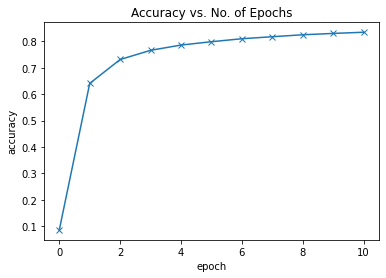

In [65]:
history = [result0] + history1 + history2
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of Epochs')

In [66]:
# The Model start pretty bad and then the progress seems to flattern out 

In [67]:
jovian.log_metrics(val_acc=history[-1]['val_acc'], val_loss=history[-1]['val_loss'])

[jovian] Metrics logged.


In [68]:
jovian.commit(project='03-logistic-regression', environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
Committed successfully! https://jovian.ai/blackholegalaxytechnologies/03-logistic-regression


'https://jovian.ai/blackholegalaxytechnologies/03-logistic-regression'

In [69]:
## Testing with individual Images 
## We will be needing more sopisticated models and we will be needed more training data 

In [70]:
### Testing with individual images 
### metrics_logges 

In [71]:
# Define the Test Dataset 
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

In [72]:
test_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

Shape: torch.Size([1, 28, 28])
Label 5


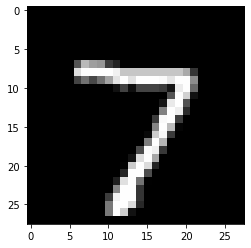

In [73]:
img, labell = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print("Shape:", img.shape)
print('Label', label)

In [74]:
# Function that can define the predict Image,
# which return the label for the Single Tensor

def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _,preds = torch.max(yb, dim=1)
  return preds[0].item()

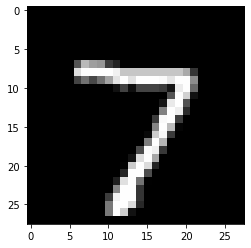

In [75]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')

In [76]:
img.shape

torch.Size([1, 28, 28])

Label: 7 Predicted: 7


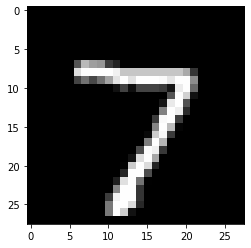

In [77]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_image(img, model))

Label 0 Predicted: 0


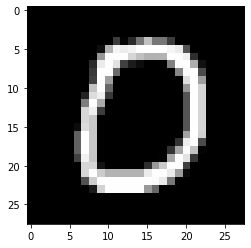

In [78]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label', label, 'Predicted:', predict_image(img, model))

Label 9 Predicted: 9


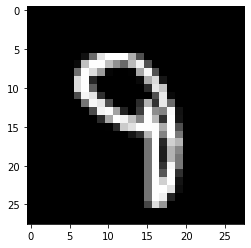

In [79]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label', label, 'Predicted:', predict_image(img, model))

Label 2 Predicted: 8


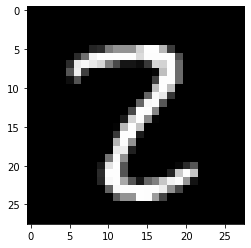

In [80]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label', label, 'Predicted:', predict_image(img, model))

In [81]:
# Remember our modelhas never ever seen the Test Datset ** 

In [82]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.83837890625, 'val_loss': 0.8609825372695923}

In [83]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.83837890625, 'val_loss': 0.8609825372695923}

In [84]:
### Saving and loading the Model 
### If u have bad test set Validation compare to the Test Set Validation this means that you have 
### bad Validation Sets

In [85]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [86]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0176,  0.0348, -0.0164,  ..., -0.0134,  0.0246, -0.0015],
                      [ 0.0117,  0.0230, -0.0038,  ..., -0.0321,  0.0340, -0.0299],
                      [ 0.0158,  0.0100, -0.0120,  ..., -0.0282,  0.0261,  0.0149],
                      ...,
                      [ 0.0326, -0.0329, -0.0250,  ..., -0.0052, -0.0287,  0.0115],
                      [-0.0043,  0.0239, -0.0211,  ...,  0.0021,  0.0084, -0.0265],
                      [ 0.0240, -0.0188, -0.0055,  ..., -0.0281, -0.0138, -0.0261]])),
             ('linear.bias',
              tensor([-0.0024,  0.0551, -0.0252, -0.0301,  0.0131, -0.0003, -0.0019,  0.0601,
                      -0.0610, -0.0299]))])

In [87]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0176,  0.0348, -0.0164,  ..., -0.0134,  0.0246, -0.0015],
                      [ 0.0117,  0.0230, -0.0038,  ..., -0.0321,  0.0340, -0.0299],
                      [ 0.0158,  0.0100, -0.0120,  ..., -0.0282,  0.0261,  0.0149],
                      ...,
                      [ 0.0326, -0.0329, -0.0250,  ..., -0.0052, -0.0287,  0.0115],
                      [-0.0043,  0.0239, -0.0211,  ...,  0.0021,  0.0084, -0.0265],
                      [ 0.0240, -0.0188, -0.0055,  ..., -0.0281, -0.0138, -0.0261]])),
             ('linear.bias',
              tensor([-0.0024,  0.0551, -0.0252, -0.0301,  0.0131, -0.0003, -0.0019,  0.0601,
                      -0.0610, -0.0299]))])

In [88]:
model2 = MnistModel()

In [89]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0084,  0.0002,  0.0150,  ..., -0.0249, -0.0272,  0.0005],
                      [-0.0306, -0.0059, -0.0117,  ...,  0.0010, -0.0079,  0.0313],
                      [ 0.0056,  0.0201, -0.0137,  ...,  0.0107, -0.0004,  0.0081],
                      ...,
                      [ 0.0324, -0.0254,  0.0346,  ..., -0.0261,  0.0273,  0.0205],
                      [ 0.0029,  0.0107,  0.0335,  ..., -0.0221,  0.0124, -0.0149],
                      [-0.0199,  0.0356,  0.0285,  ..., -0.0180,  0.0015,  0.0254]])),
             ('linear.bias',
              tensor([-0.0020, -0.0032,  0.0010, -0.0077, -0.0063,  0.0046,  0.0039, -0.0114,
                       0.0050, -0.0001]))])

In [90]:
evaluate(model2, test_loader)

{'val_acc': 0.83837890625, 'val_loss': 0.8609825372695923}

In [91]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_acc': 0.83837890625, 'val_loss': 0.8609825372695923}

In [91]:
# Ultimately is about the Tesnor being multiplied with each others and applying certain kind of functions on them
# Often people jump to a large Dataset 

In [91]:
# Insurance company predicting the medical bill based upon on your Data, age, habits 
# DataFrame 

In [91]:
# val_loss = ?????
# Ent to end training using Linear Regression 
# Same Question in Logistic Regression and Linear Regression 

In [91]:
# Lesson 3 
# Feed Forward Networks and GPUs